In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
nombre_archivo_excel = 'data.xlsx'

In [54]:
todas_las_hojas = pd.read_excel(nombre_archivo_excel, sheet_name=None, engine='openpyxl')

print(todas_las_hojas.keys())

dict_keys(['Hoja2', 'Hoja3', 'Hoja1'])


Subamortiguado

765957.4468085106
48621.663804066295 6666.666666666667


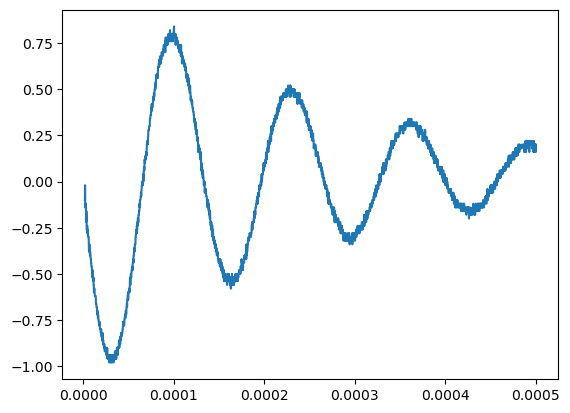

In [243]:
df = todas_las_hojas['Hoja2']
tiempo = df.iloc[8:, 3][::1]  # Esto selecciona todos los datos de la cuarta columna (D)
voltaje = df.iloc[8:, 4][::1]-5
plt.plot(tiempo, voltaje)

L =  9e-3
C = 47e-9
R = 60
valor = 4*L/C
print(valor)
w = np.sqrt((1/(L*C)-(0.03**2/(4*L**2))))
gamma = R/L
print(w,gamma)

[-1.10823311e+00  3.90146482e+03  4.76461178e+04  1.09944661e+01]


Text(0.5, 0, 'Tiempo [s]')

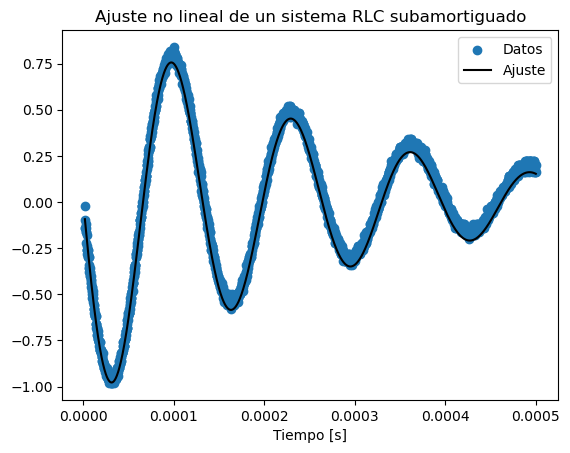

In [248]:
def ajuste(x, V, b, w,c):
    return V * np.exp(-b*x) * np.cos(w * x+c)
res_1, con_1 = curve_fit(ajuste, tiempo, voltaje, p0=[500, gamma, w,10])
print(res_1)
aju =  ajuste(tiempo,*res_1)
plt.scatter(tiempo, voltaje, label = "Datos")
plt.plot(tiempo, aju, color = "black", label = "Ajuste")
plt.legend()
plt.title("Ajuste no lineal de un sistema RLC subamortiguado")
plt.xlabel("Tiempo [s]")



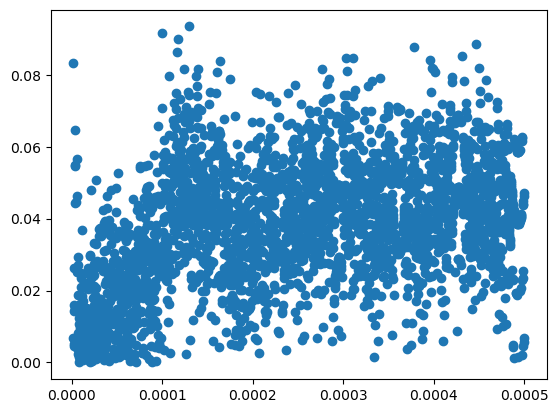

In [249]:
plt.scatter(tiempo,abs(aju-voltaje) )

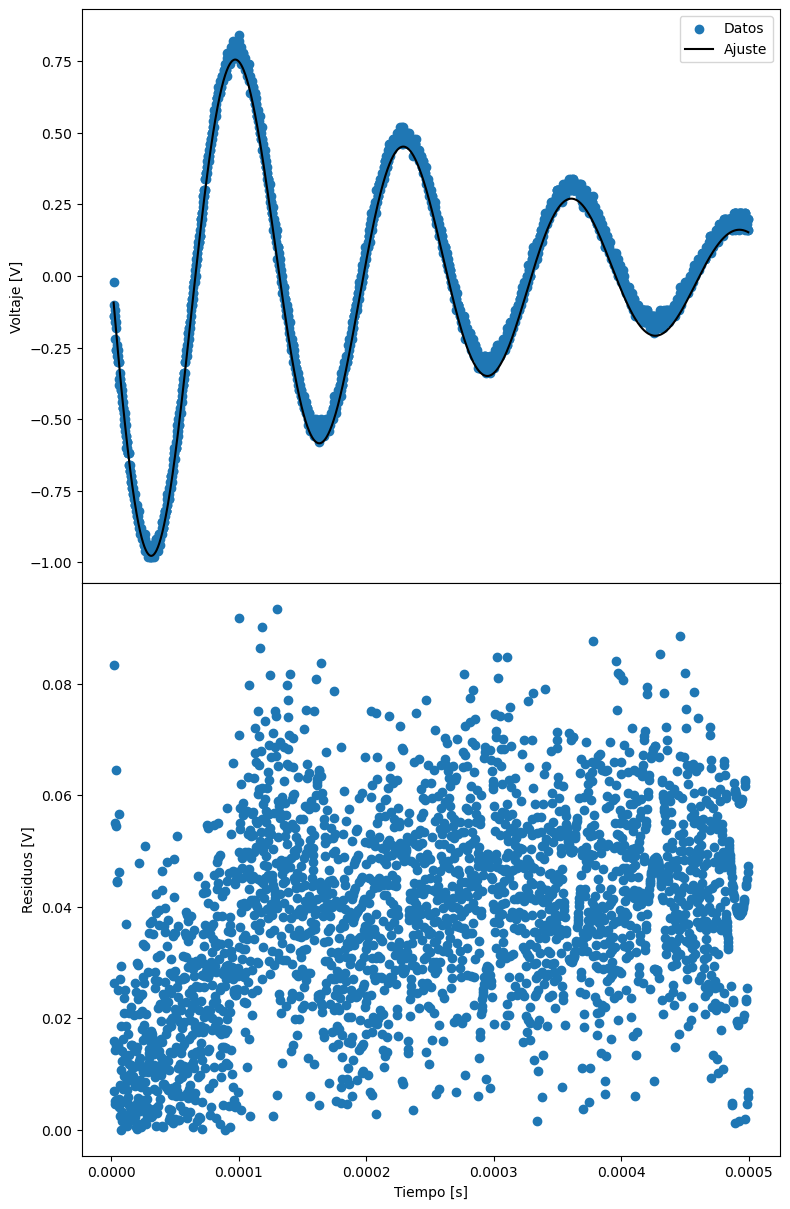

In [250]:
fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})

axs[0].scatter(tiempo, voltaje,  label='Datos')
axs[0].plot(tiempo, aju, label="Ajuste", color="black")
axs[0].set_ylabel("Voltaje [V]")
axs[0].legend()
# Subgráfico 1
axs[1].scatter(tiempo, abs(aju-voltaje))
axs[1].set_ylabel('Residuos [V]')
# Subgráfico 2 (comentado para este ejemplo)
# axs[2].scatter(x, normalize_residuales)
# axs[2].set_ylabel('Residuos Normalizados')
plt.tight_layout()
plt.xlabel("Tiempo [s]")
# Muestra el gráfico

plt.show()

In [251]:
desviaciones_estandar = (np.diag(con_1))

# Imprimir los resultados
for i, parametro in enumerate(['V', 'b', 'w', 'c']):
    print(f"{parametro} = {res_1[i]:.3f} +/- {desviaciones_estandar[i]:.3f}")


V = -1.108 +/- 0.000
b = 3901.465 +/- 434.085
w = 47646.118 +/- 434.140
c = 10.994 +/- 0.000


Critico

Text(0, 0.5, 'Voltaje [V]')

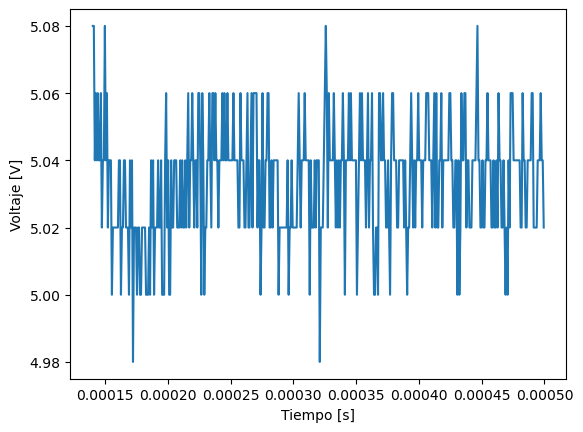

In [254]:
df = todas_las_hojas['Hoja1']
tiempo = df.iloc[700:, 3][::4]  # Esto selecciona todos los datos de la cuarta columna (D)
voltaje = df.iloc[700:, 4][::4]
plt.plot(tiempo, voltaje)
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")